<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as pyplt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn

In [92]:
original_df = pd.read_csv("KaggleV2-May-2016.csv")
original_df
#pyplt.figure(figsize=(15,15))
#seaborn.heatmap(original_df.corr(),annot=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [43]:
original_df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295D018B630>,
      dtype=object)

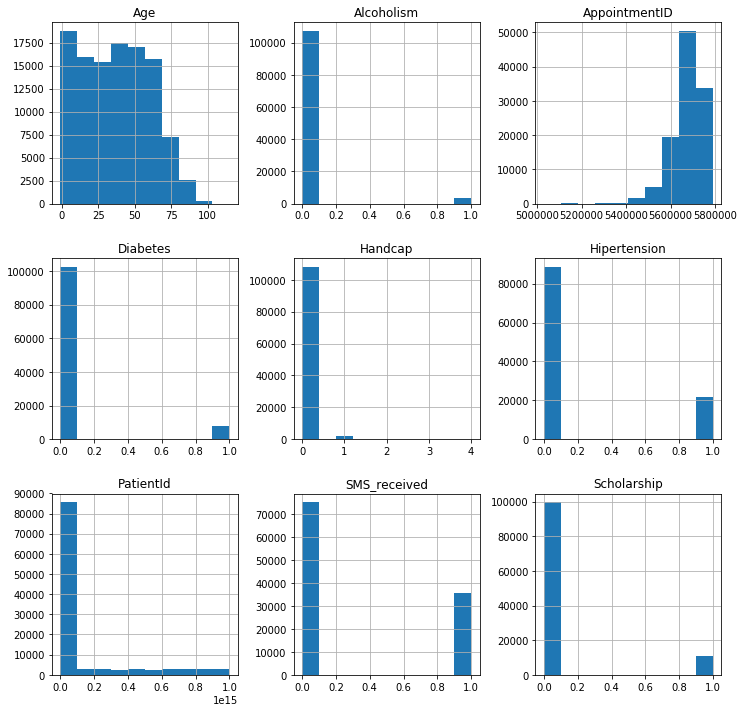

In [44]:
original_df.hist(figsize=(12,12))

In [54]:
new_df=original_df.sort_values("AppointmentDay").set_index("AppointmentDay")

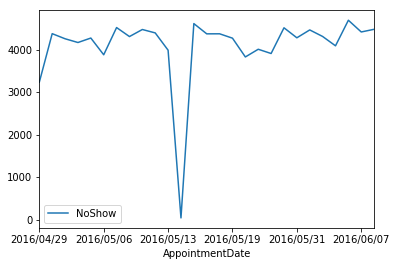

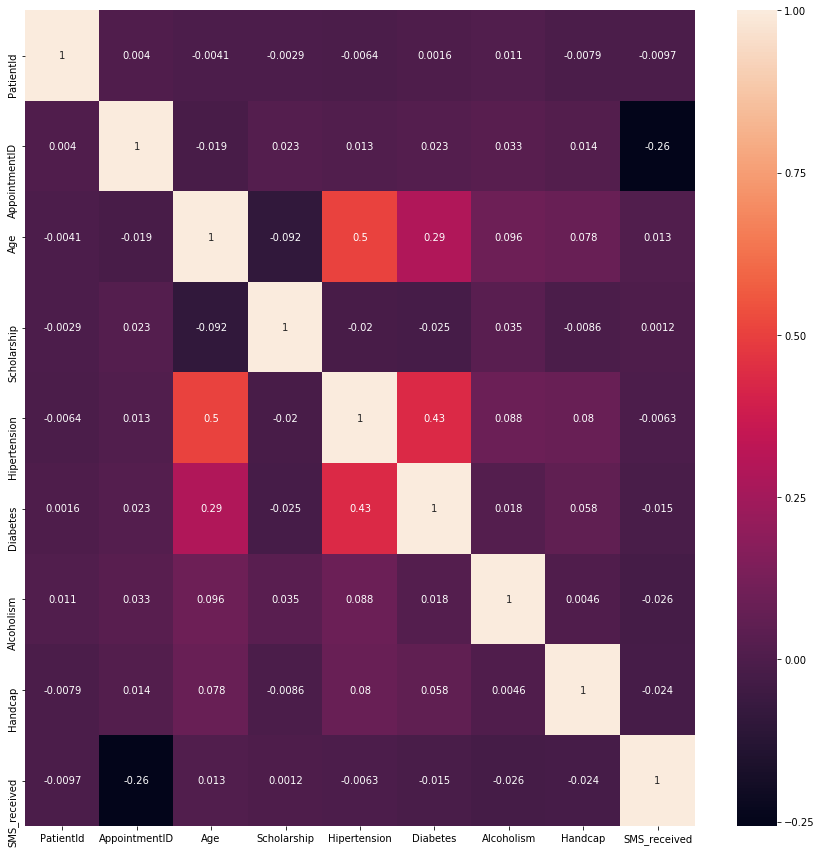

In [90]:
temp_df=pd.DataFrame(index=original_df.index)
temp_df["AppointmentDate"]= pd.to_datetime(original_df["AppointmentDay"]).apply(lambda a: '{}/{:02}/{:02}'.format(a.year,a.month,a.day))
temp_df=temp_df.sort_values("AppointmentDate")
temp_df["NoShow"]=original_df["No-show"].apply(lambda b: 1 if b=="Yes" else 0)
temp_df=pd.DataFrame(temp_df.groupby('AppointmentDate').count())
temp_df.plot()
pyplt.figure(figsize=(15,15))
seaborn.heatmap(original_df.corr(),annot=True)

In [75]:
temp_df=pd.DataFrame(temp_df.groupby("AppointmentDate").count())
temp_df

,NoShow
AppointmentDate,
2016/04,3235
2016/05,80841
2016/06,26451


In [2]:
test_datum=pd.read_csv("test.csv")
train_datum= pd.read_csv("train.csv")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3829F4B00>,
      dtype=object)

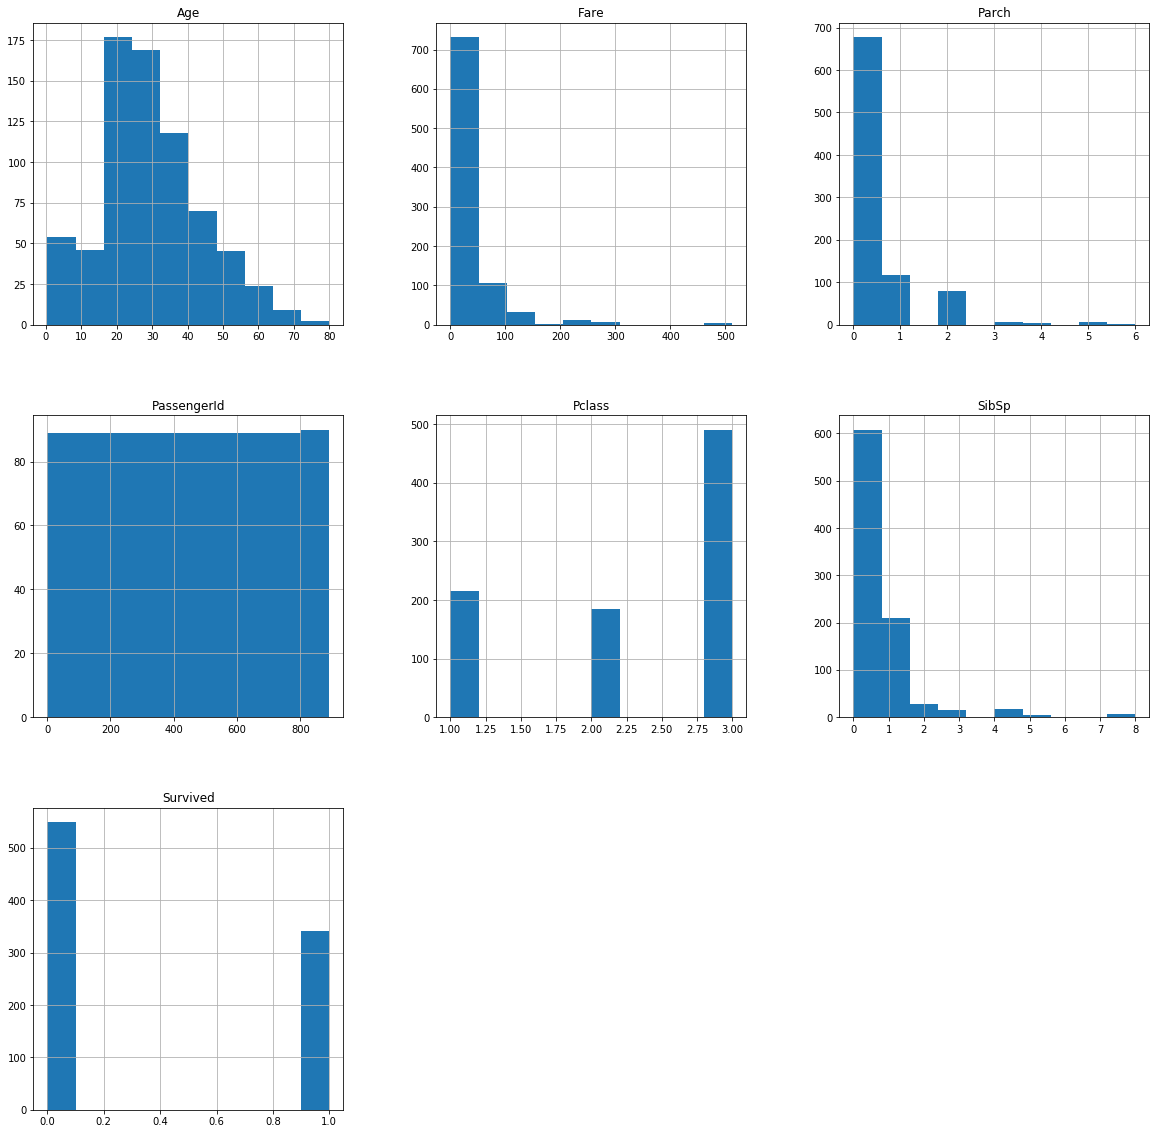

In [3]:
train_datum.hist(figsize=(20,20))

In [4]:
train_datum[train_datum["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [5]:
train_datum["Age"]=train_datum["Age"].fillna(train_datum["Age"].mean())
len(train_datum)

891

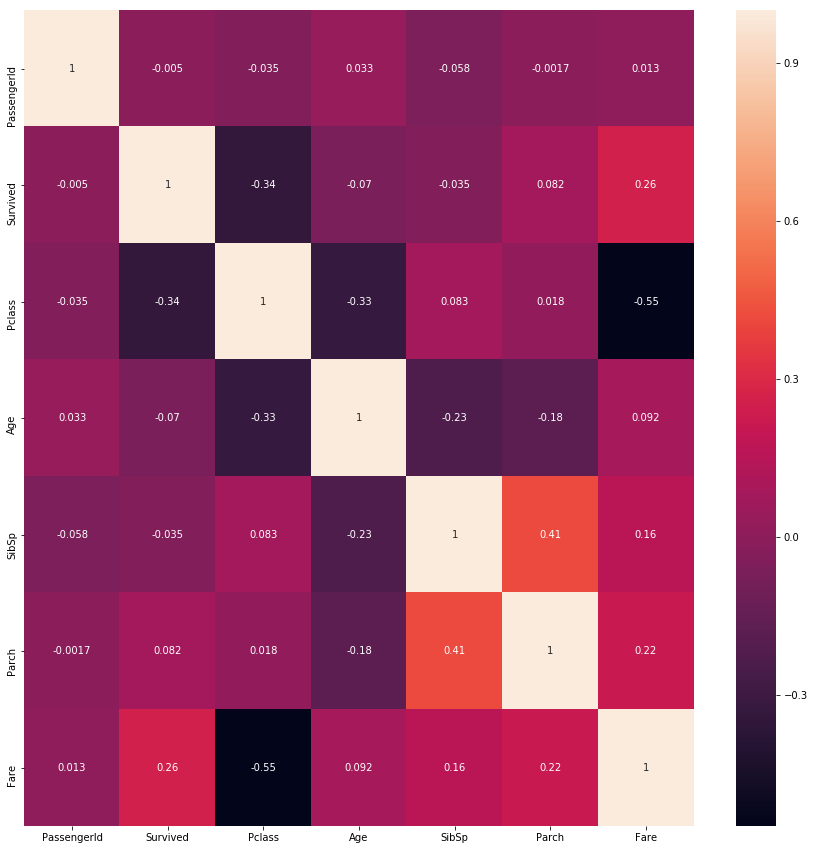

In [6]:
pyplt.figure(figsize=(15,15))
seaborn.heatmap(train_datum.corr(),annot=True)

In [7]:
train_datum["Sex"].unique()

array(['male', 'female'], dtype=object)

In [8]:
train_datum["Sex"]= train_datum["Sex"].apply(lambda s:1 if s=="male" else 0)

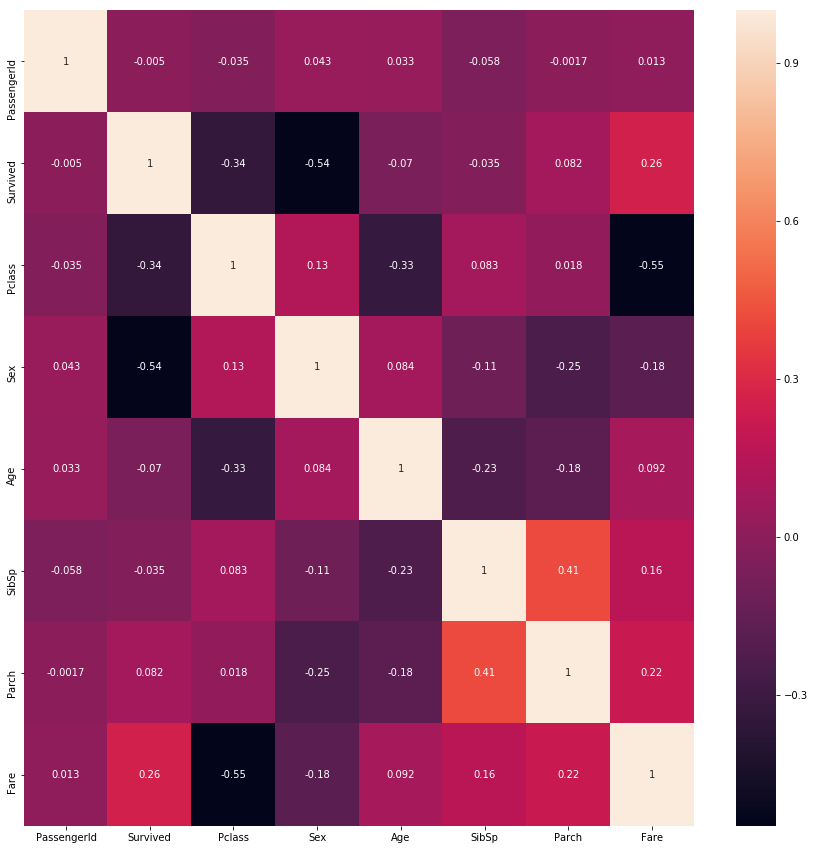

In [12]:
pyplt.figure(figsize=(15,15))
seaborn.heatmap(train_datum.corr(),annot=True)

In [14]:
tickets=train_datum["Ticket"].unique()
ticket_datum={}

In [17]:
for ticket_type in tickets:
    ticket_datum[ticket_type]= len(train_datum[train_datum["Ticket"]==ticket_type])

In [23]:
ticket_datum

{'A/5 21171': 1,
 'PC 17599': 1,
 'STON/O2. 3101282': 1,
 '113803': 2,
 '373450': 1,
 '330877': 1,
 '17463': 1,
 '349909': 4,
 '347742': 3,
 '237736': 2,
 'PP 9549': 2,
 '113783': 1,
 'A/5. 2151': 1,
 '347082': 7,
 '350406': 1,
 '248706': 1,
 '382652': 5,
 '244373': 1,
 '345763': 1,
 '2649': 1,
 '239865': 2,
 '248698': 1,
 '330923': 1,
 '113788': 1,
 '347077': 4,
 '2631': 1,
 '19950': 4,
 '330959': 1,
 '349216': 1,
 'PC 17601': 1,
 'PC 17569': 2,
 '335677': 1,
 'C.A. 24579': 1,
 'PC 17604': 2,
 '113789': 2,
 '2677': 1,
 'A./5. 2152': 1,
 '345764': 2,
 '2651': 2,
 '7546': 1,
 '11668': 2,
 '349253': 1,
 'SC/Paris 2123': 3,
 '330958': 1,
 'S.C./A.4. 23567': 1,
 '370371': 1,
 '14311': 1,
 '2662': 1,
 '349237': 2,
 '3101295': 6,
 'A/4. 39886': 1,
 'PC 17572': 3,
 '2926': 1,
 '113509': 1,
 '19947': 1,
 'C.A. 31026': 1,
 '2697': 1,
 'C.A. 34651': 3,
 'CA 2144': 6,
 '2669': 1,
 '113572': 2,
 '36973': 2,
 '347088': 6,
 'PC 17605': 1,
 '2661': 2,
 'C.A. 29395': 1,
 'S.P. 3464': 1,
 '3101281': 1,

In [25]:
max(ticket_datum.items(),key=lambda x:x[1])

('347082', 7)

In [27]:
ticket_datum.values()

AttributeError: 'dict_values' object has no attribute 'hist'

In [1]:
import pylab

3